
# Simple linear regression model for headBrain dataset and predict brain weight based on head size using the least square method.

- R^2 score for the predicted model

- Display the all the data points along with the fit model


sum_of_least_squares.avif

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> # Getting familiar with the data



In [ ]:
# Reading Data
data = pd.read_csv('/content/drive/MyDrive/AIML_datasets/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590



> # What two parameters are we trying to relate?



In [ ]:
# Collecting x and y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [ ]:
# Total number of values
n = len(x)
print(n)

237




> # Understanding the least squares method



# Intuition (for those seeking deeper understanding):

The formulas are derived from calculus-based minimization techniques that find the optimal slope (b1) and intercept (b0) by minimizing the squared differences between actual and predicted values. [ link for deriviation - https://youtu.be/Hi5EJnBHFB4?si=PAv0vQ8-7t7CetRe ]

Numerator of b1:

> Represents the covariance between x (head size) and y (brain weight).
Covariance measures how changes in one variable (x) are associated with changes in another variable (y).
A positive covariance means that as x increases, y also increases (positive correlation). A negative covariance means the opposite.


Denominator of b1:

> This normalizes the slope calculation by accounting for the spread in the independent variable x.
If the variance in x is small, the slope will be steep because small changes in
X cause large changes in Y. Conversely, a larger variance results in a gentler slope.

The intercept, b0:

> It provides a baseline or starting point for the regression line.


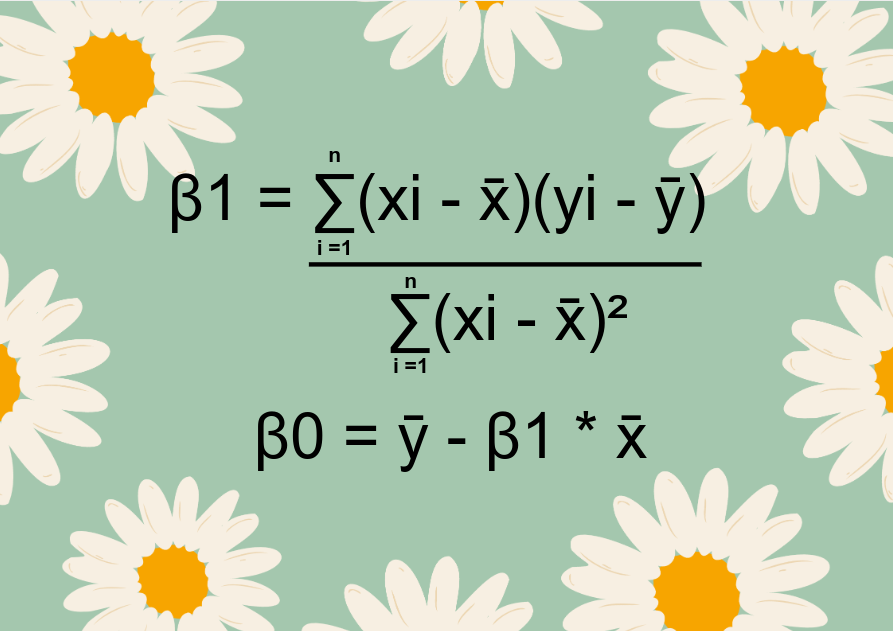

# Primary aim:

Find a value for **slope** (b1 or m) and **intercept** (b0 or c) such that the difference between the **predicted value** (Y) and the **actual value** (y) is minimised

In [ ]:
# Calculating coefficient
# Mean X and Y
mean_x = np.mean(x)
mean_y = np.mean(y)
print(mean_x)
print(mean_y)

3633.9915611814345
1282.873417721519


In [ ]:
# Using the formula to calculate b1 and b0
numer = 0
denom = 0
for i in range(n):
  numer += (x[i] - mean_x) * (y[i] - mean_y)
  denom += (x[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

In [ ]:
# Printing coefficients
print(f"Coefficients: b1={b1}, b0={b0}")

Coefficients: b1=0.26342933948939945, b0=325.57342104944223




> # Let's start plotting



In [ ]:
# Calculating the upper bound and lower bound with which we plot the graph
max_x = np.max(x) + 100
min_x = np.min(x) - 100

Note: the purpose of adding and subtracting 100 is to create a buffer space

In [ ]:
# Calculating line values X and Y
X = np.linspace(min_x, max_x, 1000) # an array of 1000 evenly spaced values within the specified interval [min_x, max_x]
Y = b0 + b1 * X

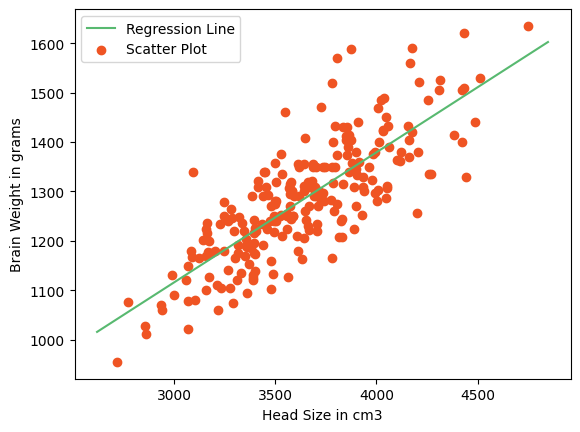

In [ ]:
# Ploting Line
plt.plot(X, Y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x, y, c='#ef5423', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()



> # Measuring how accurate our model is



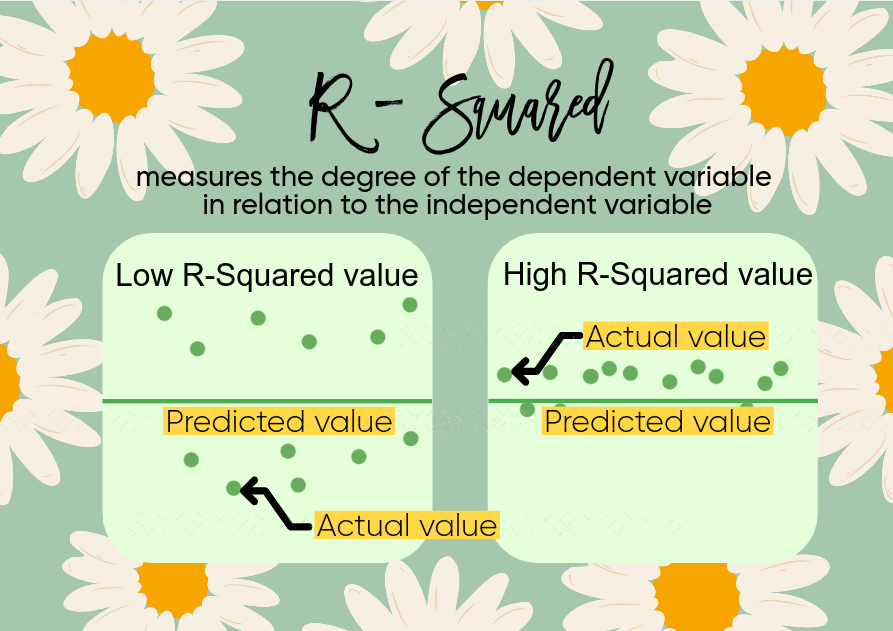


> Key points:


- R² values range from **0 to 1**.
- A high R² value suggests that the model is **good at predicting** the dependent variable
- A low R² value suggests that the model **does not explain much of the variation** in the dependent variable.



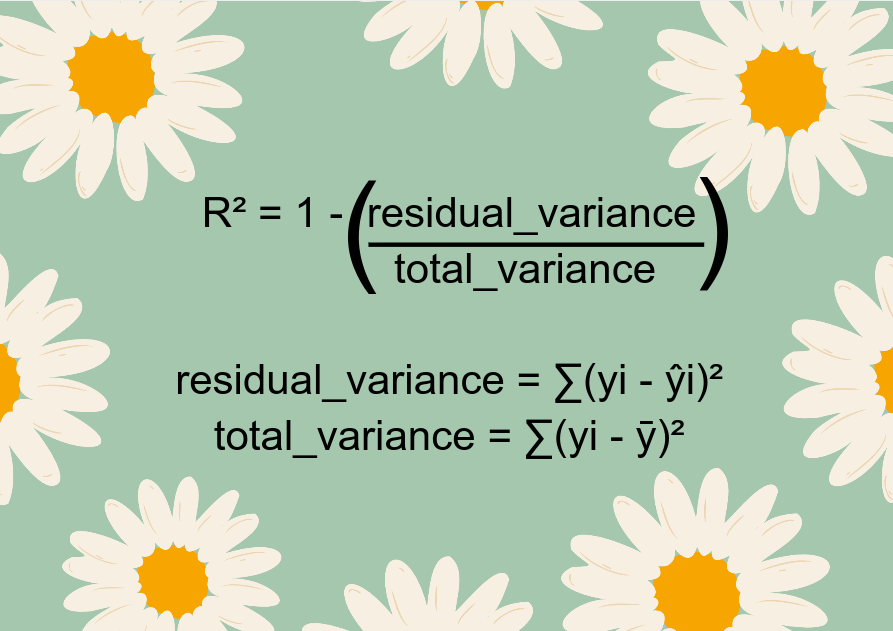

In [ ]:
# Calculating R2 Score
total_variance = 0
residual_variance = 0
for i in range(n):
  y_pred = b0 + b1 * x[i]   # use the values of b1 and b0 we calculated to get the individual predicted y value
  residual_variance += (y[i] - y_pred) ** 2
  total_variance += (y[i] - mean_y) ** 2
r2 = 1 - (residual_variance/total_variance)
print(f"R2 Score: {r2}")

R2 Score: 0.6393117199570003
